[YouTube](https://www.youtube.com/watch?v=JElfEE1OrSU)

[YouTube2](https://www.youtube.com/watch?v=2xudPOBz-vs)

[YouTube3](https://www.youtube.com/watch?v=ZNJ3lKyI-EY)

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt 

In [67]:
class GradientBoostingRegression():
  def __init__(self, num_algoritms = 300, error = 'MSE'):
    self.y_train = None
    self.y_start_mean = None
    self.y_pred = 0
    self.x_train = None
    self.n = num_algoritms
    self.error = error
    self.trees = []
  def fit(self, X_train, y_train):
    self.y_start_mean = y_train.mean()
    print(self.y_start_mean)
    self.y_pred = np.full(len(y_train), self.y_start_mean)
    print('start MSE', np.sum((y_train  - self.y_pred)**2))
    for ntree in range(self.n):
      error_i = y_train  - self.y_pred
      model_tree = DecisionTreeRegressor(max_depth = 2)
      model_tree.fit(X_train[:, np.newaxis], error_i)
      self.trees.append(model_tree)
      self.y_pred += model_tree.predict(X_train[:, np.newaxis])
    print('end MSE', self.mse(y_train,self.y_pred))
    return 
  def multi_tree_predict(self, X_test):
    predict = np.full(len(X_test), self.y_start_mean)
    for tree in self.trees:
      predict += tree.predict(X_test)
    return predict
  def fit_test(self, X_train, y_train, X_test, y_test):
    return
  def mse(self, y1, y2):
    return np.sum((y1 - y2)**2)
  def predict(self, X_test, y_test):
    predict = self.multi_tree_predict(X_test[:, np.newaxis])
    print('MSE', self.mse(y_test,predict))
    return predict
  

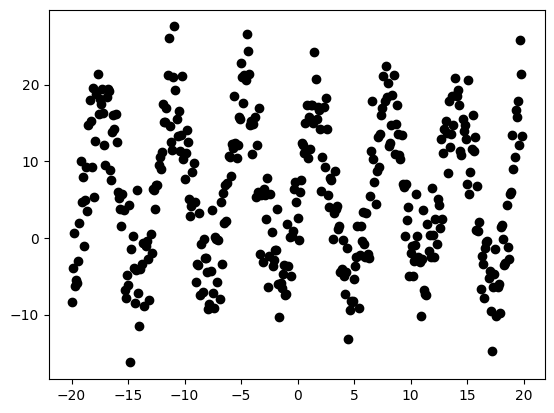

In [68]:
x = np.arange(-20, 20, 0.1)
trash = np.random.normal(0,4, size = len(x))
y = 6 + 12*np.sin(x) + trash

plt.plot(x, y,'ko')

In [69]:
model = GradientBoostingRegression()
model.fit(x, y)


5.862474492815278
start MSE 33724.76170615269
end MSE 4.397239278373431


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [71]:
model2 = GradientBoostingRegression()
model2.fit(X_train, y_train)
model2.predict(X_test, y_test)

5.6498744091683095
start MSE 22807.10294415194
end MSE 0.07537506772612126
(132,) (132,)
MSE 4775.539181110289


array([ 17.30387398,  18.44453531,  19.44242253,  11.58656442,
        19.26519942,  15.08754041,   2.49158031,  16.53075357,
        11.33749602,  -7.13925148,  10.01145345,   0.93099013,
         6.20823595,  -1.95425285,  -3.41149226,   6.03947955,
        18.44453531,  -1.46814851,   7.48823482,  -3.22717933,
         3.78173163,   3.57283456,  13.37998751,   8.70604376,
        -3.90773929,  25.82027558,  -0.88296762,   9.22383524,
        -2.66897529,  12.58478145,  16.6401898 ,  -4.90570384,
        -2.42910678,   6.20823595,   7.48823482,  -0.07427427,
        -3.48537173,  18.51180652,  15.28082219,  12.21150579,
        -3.55263108,   0.31082295,   3.78173163,  17.50824312,
        17.43134115,  -3.55263108,  15.54499836,   3.71791307,
        21.32574858,  -6.42361107,  -6.74096737,   2.42124338,
        20.91614805,  -8.08877415,  -1.46814851,  14.2968053 ,
        10.59958217,   5.65244657,  12.15243704,  21.03214388,
        -4.2921161 ,   7.04004672,  -9.08622436,  11.27

In [44]:
xi = x # initialization of input
yi = y # initialization of target
# x,y --> use where no need to change original y
ei = 0 # initialization of error
n = len(yi)  # number of rows
predf = 0 # initial prediction 0

for i in range(30): # like n_estimators
    model_tree = DecisionTree(xi,yi)
    model_tree.find_better_split(0)
    
    r = np.where(xi == model_tree.split)[0][0]    
    
    left_idx = np.where(xi <= model_tree.split)[0]
    right_idx = np.where(xi > model_tree.split)[0]
    
    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))  # replace left side mean y
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))  # right side mean y
    
    predi = predi[:,None]  # make long vector (nx1) in compatible with y
    predf = predf + predi  # final prediction will be previous prediction value + new prediction of residual
    
    ei = y - predf  # needed originl y here as residual always from original y    
    yi = ei # update yi as residual to reloop
    
    
    # plotting after prediction
    xa = np.array(x.x) # column name of x is x 
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(predf)[order]
    
    #epreds = np.array(epred[:,None])[order]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))

    ax1.plot(x,y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')
    
    

NameError: ignored

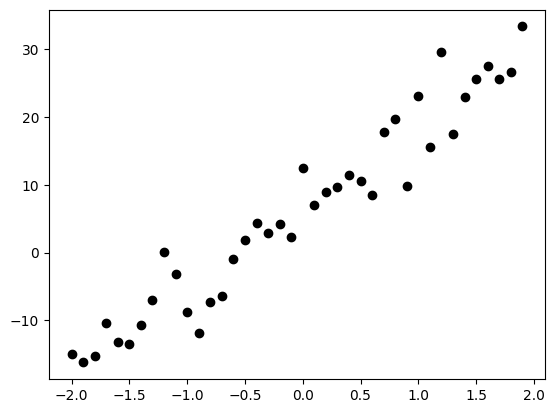

In [ ]:
x = np.arange(-2, 2, 0.1)
trash = np.random.normal(0,4, size = len(x))
y = 6 + 12*x + trash

plt.plot(x, y,'ko')

In [ ]:
x = x.reshape(1, -1)
model_tree = DecisionTreeRegressor(max_depth = 2)
model_tree.fit(x.T, y.T)

DecisionTreeRegressor(max_depth=2)

In [ ]:
X_test = np.arange(-2, 2, 0.1)[:, np.newaxis]
model_tree.predict(X_test)

array([-9.90748811, -9.90748811, -9.90748811, -9.90748811, -9.90748811,
       -9.90748811, -9.90748811, -9.90748811, -9.90748811, -9.90748811,
       -9.90748811, -9.90748811, -9.90748811, -9.90748811,  2.47962138,
        2.47962138,  2.47962138,  2.47962138,  2.47962138,  2.47962138,
       11.58925513, 11.58925513, 11.58925513, 11.58925513, 11.58925513,
       11.58925513, 11.58925513, 11.58925513, 11.58925513, 11.58925513,
       24.75874284, 24.75874284, 24.75874284, 24.75874284, 24.75874284,
       24.75874284, 24.75874284, 24.75874284, 24.75874284, 24.75874284])

[[-99.97712504]
 [-99.42593459]
 [-96.34234453]
 [-96.12660843]
 [-94.52248136]
 [-92.18904335]
 [-90.00930821]
 [-89.32749098]
 [-82.99115773]
 [-81.53228105]
 [-80.33063323]
 [-79.53311423]
 [-79.35479868]
 [-77.05080541]
 [-73.99428558]
 [-72.50505917]
 [-72.14473055]
 [-71.92261228]
 [-70.65428502]
 [-70.64882184]
 [-66.92916058]
 [-66.03391609]
 [-62.74795772]
 [-60.37970218]
 [-59.10955005]
 [-57.6743768 ]
 [-52.59460395]
 [-46.89066813]
 [-46.01442165]
 [-43.91120159]
 [-42.44493228]
 [-41.27717033]
 [-39.53348547]
 [-37.31516437]
 [-36.8968738 ]
 [-30.88785459]
 [-30.44682805]
 [-30.2203316 ]
 [-20.64650515]
 [-20.4646326 ]
 [-18.37263945]
 [-17.18880244]
 [-17.16414609]
 [-16.59559906]
 [-16.53903953]
 [-16.16109712]
 [-15.778475  ]
 [-14.38176203]
 [-10.42129476]
 [-10.0175733 ]
 [ -1.68536814]
 [  2.97782241]
 [  6.63305699]
 [  7.17928118]
 [  7.7633468 ]
 [ 11.73796569]
 [ 14.73589733]
 [ 14.8235211 ]
 [ 15.67792288]
 [ 17.3110081 ]
 [ 17.86110738]
 [ 23.42898272]
 [ 24.33

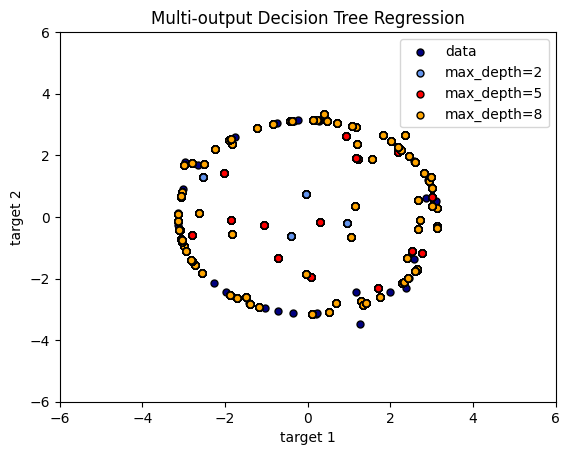

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += 0.5 - rng.rand(20, 2)
print(X)
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
print(X_test)
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

